Classes array shape: (2,)
Classes array content: [b'non-cat' b'cat']
Shape of new_test_Y: (1, 46)
length 1
Cost after iteration 0 is: 0.6931471805599453
Cost after iteration 50 is: 0.7281013187730967
Cost after iteration 100 is: 0.6498112732446271
Cost after iteration 150 is: 0.5919060823227434
Cost after iteration 200 is: 0.5383118237783534
Cost after iteration 250 is: 0.4875820528641597
Cost after iteration 300 is: 0.439261694788975
Cost after iteration 350 is: 0.3932376486927422
Cost after iteration 400 is: 0.3498247654306744
Cost after iteration 450 is: 0.3102483733092726
Cost after iteration 500 is: 0.2784984357971255
Cost after iteration 550 is: 0.26060102377338373
Cost after iteration 600 is: 0.24976400229871917
Cost after iteration 650 is: 0.240093693258189
Cost after iteration 700 is: 0.23117767283922816
Cost after iteration 750 is: 0.2229155289076536
Cost after iteration 800 is: 0.21522905139235474
Cost after iteration 850 is: 0.2080545572409308
Cost after iteration 900 is: 0

Cost after iteration 8250 is: 0.032415744214278445
Cost after iteration 8300 is: 0.03222280103463029
Cost after iteration 8350 is: 0.032032078087595096
Cost after iteration 8400 is: 0.031843537904398554
Cost after iteration 8450 is: 0.03165714384608835
Cost after iteration 8500 is: 0.03147286008082155
Cost after iteration 8550 is: 0.0312906515618921
Cost after iteration 8600 is: 0.03111048400646968
Cost after iteration 8650 is: 0.030932323875023985
Cost after iteration 8700 is: 0.030756138351408096
Cost after iteration 8750 is: 0.030581895323577312
Cost after iteration 8800 is: 0.030409563364919377
Cost after iteration 8850 is: 0.03023911171617318
Cost after iteration 8900 is: 0.030070510267915983
Cost after iteration 8950 is: 0.02990372954359674
Cost after iteration 9000 is: 0.029738740683096617
Cost after iteration 9050 is: 0.0295755154267981
Cost after iteration 9100 is: 0.029414026100143275
Cost after iteration 9150 is: 0.029254245598665386
Cost after iteration 9200 is: 0.029096147

Cost after iteration 5600 is: 0.033637317546223705
Cost after iteration 5650 is: 0.03334608215958418
Cost after iteration 5700 is: 0.03305972885288098
Cost after iteration 5750 is: 0.03277813756619673
Cost after iteration 5800 is: 0.032501192110399965
Cost after iteration 5850 is: 0.03222878001326917
Cost after iteration 5900 is: 0.03196079237287211
Cost after iteration 5950 is: 0.031697123717805024
Cost after iteration 6000 is: 0.03143767187392215
Cost after iteration 6050 is: 0.031182337837206225
Cost after iteration 6100 is: 0.030931025652454022
Cost after iteration 6150 is: 0.03068364229747003
Cost after iteration 6200 is: 0.03044009757247829
Cost after iteration 6250 is: 0.030200303994482224
Cost after iteration 6300 is: 0.02996417669631577
Cost after iteration 6350 is: 0.02973163333014606
Cost after iteration 6400 is: 0.02950259397519901
Cost after iteration 6450 is: 0.02927698104949778
Cost after iteration 6500 is: 0.029054719225408678
Cost after iteration 6550 is: 0.02883573534

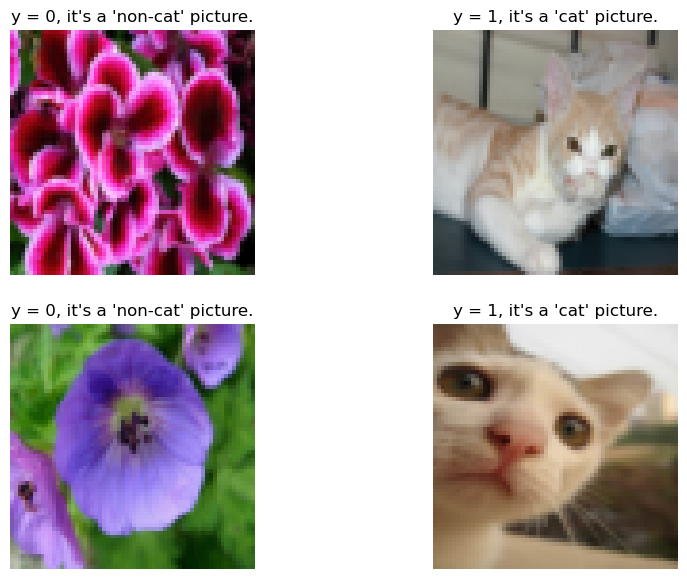

In [35]:

import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
%matplotlib inline

# Load the data
train_dataset = h5py.File('/Users/yeji_kim/Desktop/Ams595/homework/homework3/train_catvnoncat.h5', "r")
test_dataset = h5py.File('/Users/yeji_kim/Desktop/Ams595/homework/homework3/test_catvnoncat.h5', "r")

# Extract the data
train_X = np.array(train_dataset["train_set_x"][:])
train_Y = np.array(train_dataset["train_set_y"][:])
test_X = np.array(test_dataset["test_set_x"][:])
test_Y = np.array(test_dataset["test_set_y"][:])
classes = np.array(test_dataset["list_classes"][:])


train_Y = train_Y.reshape((1, train_Y.shape[0]))
test_Y  = test_Y.reshape((1, test_Y.shape[0]))

# Define the split
student_id_last_digit = 3  # Change this to your last digit
train_set_length = 160 + student_id_last_digit
test_set_length = 209 - train_set_length



new_train_X = train_X[:train_set_length]
new_train_Y = train_Y[:, :train_set_length] # remaining images in the original training set 
new_test_X = train_X[train_set_length:] # remaining images in the original training set 
new_test_Y = train_Y[:, train_set_length:]




# Flatten the data
new_train_X_flat = (new_train_X.reshape(new_train_X.shape[0], -1) / 255).T
new_test_X_flat = (new_test_X.reshape(new_test_X.shape[0], -1) / 255).T


print("Classes array shape:", classes.shape)
print("Classes array content:", classes)
print("Shape of new_test_Y:", new_test_Y.shape)
print("length",len(new_test_Y))

train_X_flat = (train_X.reshape(train_X.shape[0], -1)/255).T  # flatten the image to have a vector, normalize to prevent the calculations from exploding

test_X_flat = (test_X.reshape(test_X.shape[0], -1)/255).T



def sigmoid(z):
    
    return 1/(1+np.exp(-z))




# Training the model on the modified dataset
def propagate(w, b, X, Y):
    
    m = X.shape[1]

    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X) + b)
    cost = np.sum(((- np.log(A))*Y + (-np.log(1-A))*(1-Y)))/m  # compute cost

    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (np.dot(X,(A-Y).T))/m
    db = (np.sum(A-Y))/m

    cost = np.squeeze(cost)

    return dw, db, cost













##Training

X = train_X_flat
Y = train_Y
dim = train_X_flat.shape[0]
w = np.zeros((dim,1)) # initialize w, shape (dim, 1)
b = 0 # initialize b, scalar
num_iterations = 10000
learning_rate = 0.006
record_cost = 50  # print out the cost every 50 iterations
costs = []



for i in range(num_iterations):
    dw, db, cost = propagate(w, b, X, Y)


    # gradient descent
    w = w - (learning_rate*dw)
    b = b - (learning_rate*db)

    # Record the costs
    if i % record_cost == 0:
        costs.append(cost)
        print (f"Cost after iteration {i} is: {cost}")

scipy.io.savemat("weights.mat", {"weights":w})
scipy.io.savemat("biases.mat", {"biases":b})





# Save the weights and biases
scipy.io.savemat("weights_modified.mat", {"weights": w_modified})
scipy.io.savemat("biases_modified.mat", {"biases": b_modified})

# Load the saved weights and biases
w_modified = scipy.io.loadmat('weights_modified.mat')["weights"]
b_modified = scipy.io.loadmat('biases_modified.mat')["biases"]

# Make predictions on the modified test set
A_modified_test = sigmoid(np.dot(w_modified.T, new_test_X_flat) + b_modified)
Y_predict_modified_test = (A_modified_test >= 0.5) * 1.0


print("Y_predict_modified_test contents:", Y_predict_modified_test)
print("new_test_Y contents:", new_test_Y)


print("Before np.where")
indices_tuple = np.where(Y_predict_modified_test != new_test_Y)
print("indice tuple", indices_tuple)

# Find the misclassified indices
misclassified_indices_modified = np.where(Y_predict_modified_test != new_test_Y)[1]
print("Misclassified Indices (Modified): ", misclassified_indices_modified)

# Display some of the misclassified images from the modified set


print("Classes array shape:", classes.shape)
print("Classes array content:", classes)
print("Shape of new_test_Y:", new_test_Y.shape)
print("Before np.where")
indices_tuple = np.where(Y_predict_modified_test != new_test_Y)
print("indice tuple", indices_tuple)

















# Re-train the model on the modified dataset
X_modified = new_train_X_flat
Y_modified = new_train_Y
dim_modified = new_train_X_flat.shape[0]
w_modified = np.zeros((dim_modified, 1))  # initialize w, shape (dim, 1)
b_modified = 0  # initialize b, scalar
num_iterations_modified = 10000
learning_rate_modified = 0.006
record_cost_modified = 50  # print out the cost every 50 iterations
costs_modified = []

for i in range(num_iterations_modified):
    dw_modified, db_modified, cost_modified = propagate_modified(w_modified, b_modified, X_modified, Y_modified)

    # gradient descent
    w_modified = w_modified - (learning_rate_modified * dw_modified)
    b_modified = b_modified - (learning_rate_modified * db_modified)

    # Record the costs
    if i % record_cost_modified == 0:
        costs_modified.append(cost_modified)
        print(f"Cost after iteration {i} is: {cost_modified}")

# Save the weights and biases
scipy.io.savemat("weights_modified.mat", {"weights": w_modified})
scipy.io.savemat("biases_modified.mat", {"biases": b_modified})

# Load the saved weights and biases
w_modified = scipy.io.loadmat('weights_modified.mat')["weights"]
b_modified = scipy.io.loadmat('biases_modified.mat')["biases"]

# Make predictions on the modified test set
A_modified_test = sigmoid(np.dot(w_modified.T, new_test_X_flat) + b_modified)
Y_predict_modified_test = (A_modified_test >= 0.5) * 1.0
Y_predict_train = sigmoid(np.dot(w.T,X) + b)
print(Y_predict_modified_test)

print(f"train accuracy: {(100 - np.mean(np.abs(Y_predict_train - train_Y)) * 100):2f}")
print(f"test accuracy: {(100 - np.mean(np.abs(Y_predict_modified_test - new_test_Y)) * 100):2f}")



print("Y_predict_modified_test contents:", Y_predict_modified_test)
print("new_test_Y contents:", new_test_Y)


print("Before np.where")
indices_tuple = np.where(Y_predict_modified_test != new_test_Y)
print("indice tuple", indices_tuple)

# Find the misclassified indices
misclassified_indices_modified = np.where(Y_predict_modified_test != new_test_Y)[1]
print("Misclassified Indices (Modified): ", misclassified_indices_modified)











fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2

for i in range(min(4, len(misclassified_indices_modified))):

    if new_test_Y[0, misclassified_indices_modified[i]] < len(classes):
        fig.add_subplot(rows, columns, i + 1)
        plt.imshow(new_test_X[misclassified_indices_modified[i]])
        plt.axis('off')
        class_index = int(new_test_Y[0, misclassified_indices_modified[i]])
        plt.title("y = " + str(new_test_Y[0, misclassified_indices_modified[i]]) + ", it's a '" +
              classes[new_test_Y[0, misclassified_indices_modified[i]]].decode("utf-8") + "' picture.")


plt.show()


